В файле electric_power.xml - данные о почасовом потреблении электроэнергии за два года.\
Укрупните данные до суточного потребления. Спрогнозируйте потребление на 7 суток вперед. Оцените качество прогноза с помощью пары метрик.
Продемонстрируйте результат визуально на графике.

In [51]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
import os
os.chdir("/Users/egorgusev/Анализ данных/data_mining_spbu/HW9")

In [3]:
df = pd.read_csv('electric_power.csv', sep=',')

In [4]:
df.head()

,VALUE,DATE,HOUR
0,243887.0,01.01.2009 0:00:00.000000,1
1,243068.0,01.01.2009 0:00:00.000000,2
2,242266.0,01.01.2009 0:00:00.000000,3
3,242659.0,01.01.2009 0:00:00.000000,4
4,243724.0,01.01.2009 0:00:00.000000,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17518 entries, 0 to 17517
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VALUE   17518 non-null  float64
 1   DATE    17518 non-null  object 
 2   HOUR    17518 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 410.7+ KB


Text(0.5, 1.0, 'Почасовое потребление электроэнергии')

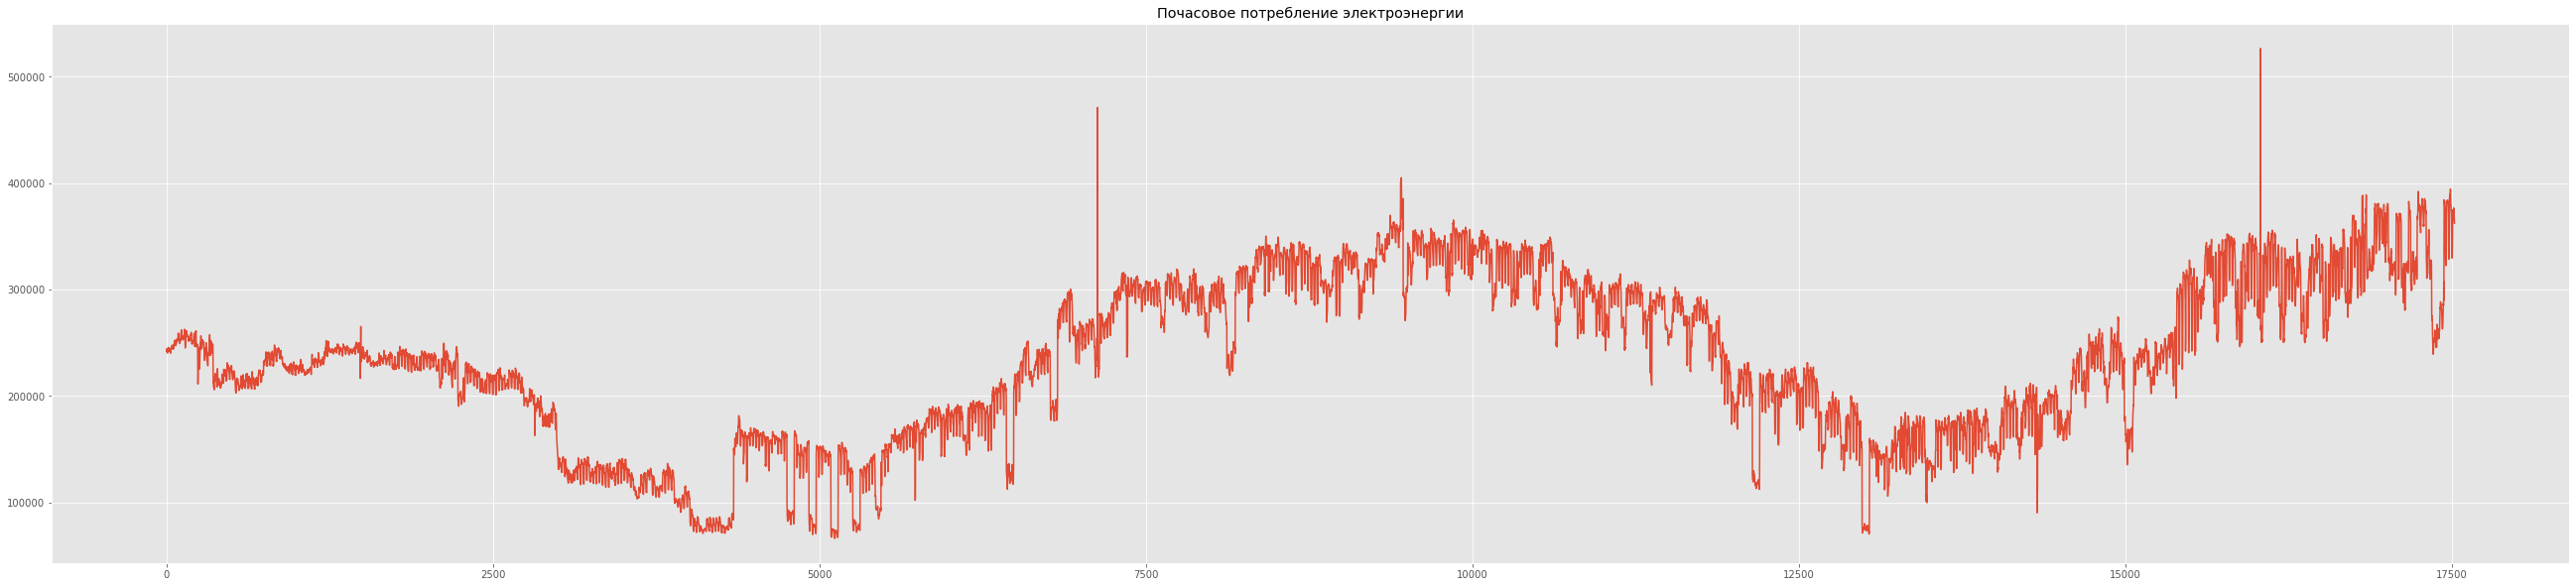

In [6]:
fig = plt.figure(figsize=(100, 10))
ax1 = fig.add_subplot(121)
df['VALUE'].plot(ax=ax1)
ax1.set_title(u'Почасовое потребление электроэнергии')

In [7]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%d.%m.%Y %H:%M:%S.%f')

Text(0.5, 1.0, 'Поcуточное потребление электроэнергии')

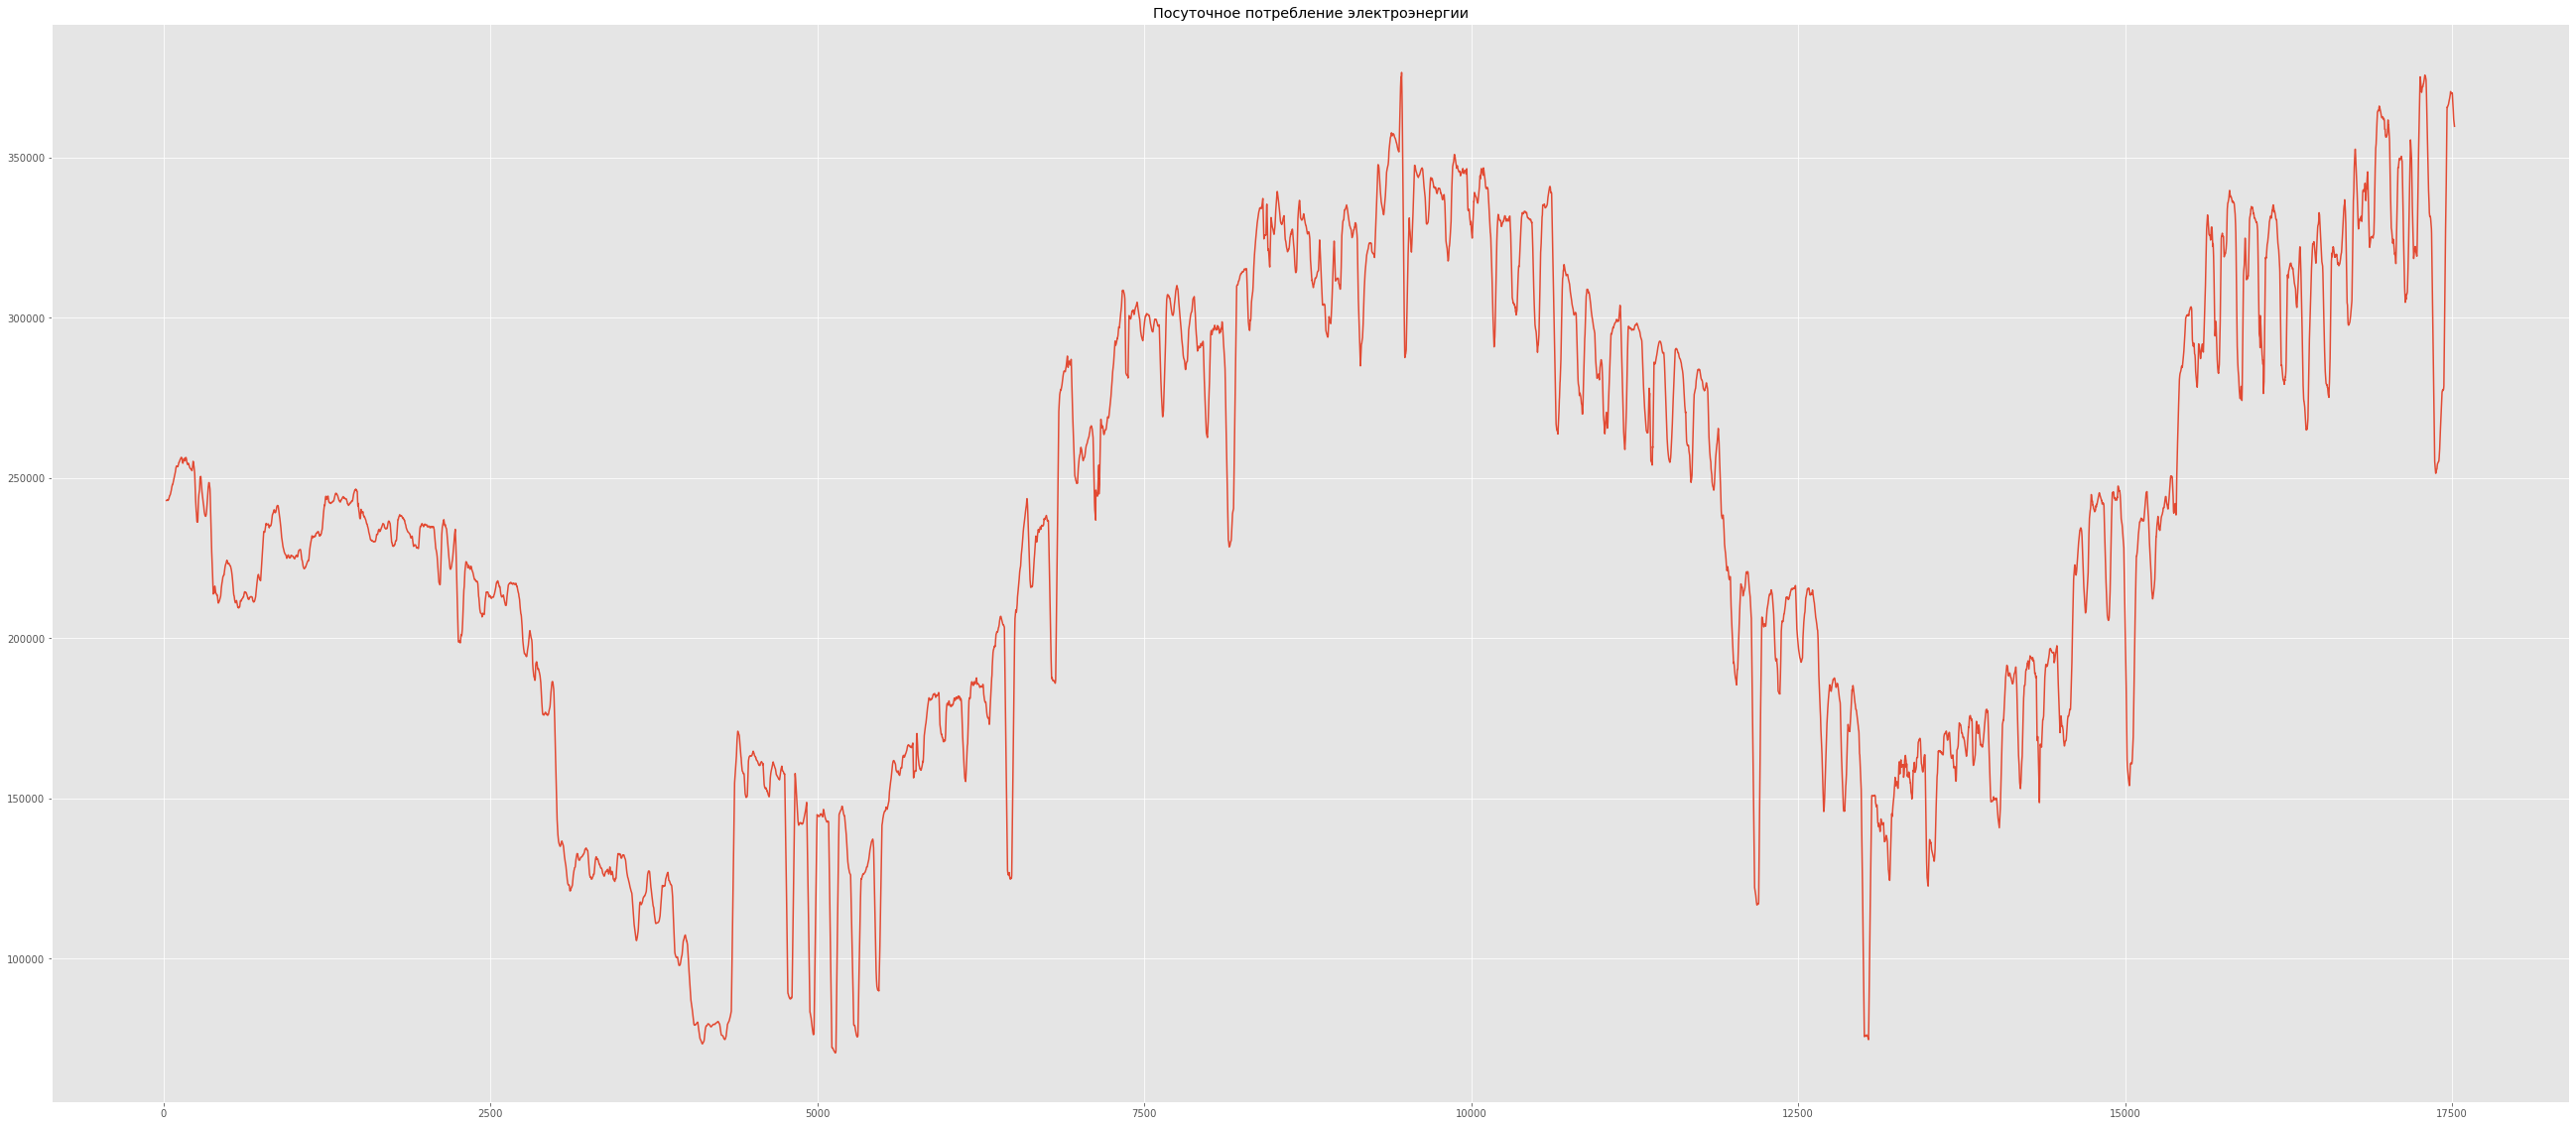

In [8]:
fig = plt.figure(figsize=(100, 20))
ax1 = fig.add_subplot(121)
(df.rolling(24).mean())['VALUE'].plot(ax=ax1)
ax1.set_title(u'Поcуточное потребление электроэнергии')

In [36]:
#берём среднее значение за каждый день
new_df = df[['DATE', 'VALUE']].groupby('DATE').sum().sort_values(by = 'DATE')
new_df.head(10)

,VALUE
DATE,
2009-01-01,5830312.0
2009-01-02,5865441.0
2009-01-03,5949114.0
2009-01-04,6067779.0
2009-01-05,6115772.0
2009-01-06,6133574.0
2009-01-07,6139496.0
2009-01-08,6108189.0
2009-01-09,6062555.0


In [37]:
new_df.to_csv('out.csv')

In [10]:
def plotMovingAverage(series, n):

    """
    series - dataframe with timeseries
    n - rolling window size 

    """

    rolling_mean = series.rolling(window=n).mean()

    #При желании, можно строить и доверительные интервалы для сглаженных значений
    rolling_std =  series.rolling(window=n).std()
    upper_bond = rolling_mean+1.96*rolling_std
    lower_bond = rolling_mean-1.96*rolling_std

    plt.figure(figsize=(100,50))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    plt.plot(lower_bond, "r--")
    plt.plot(df[n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

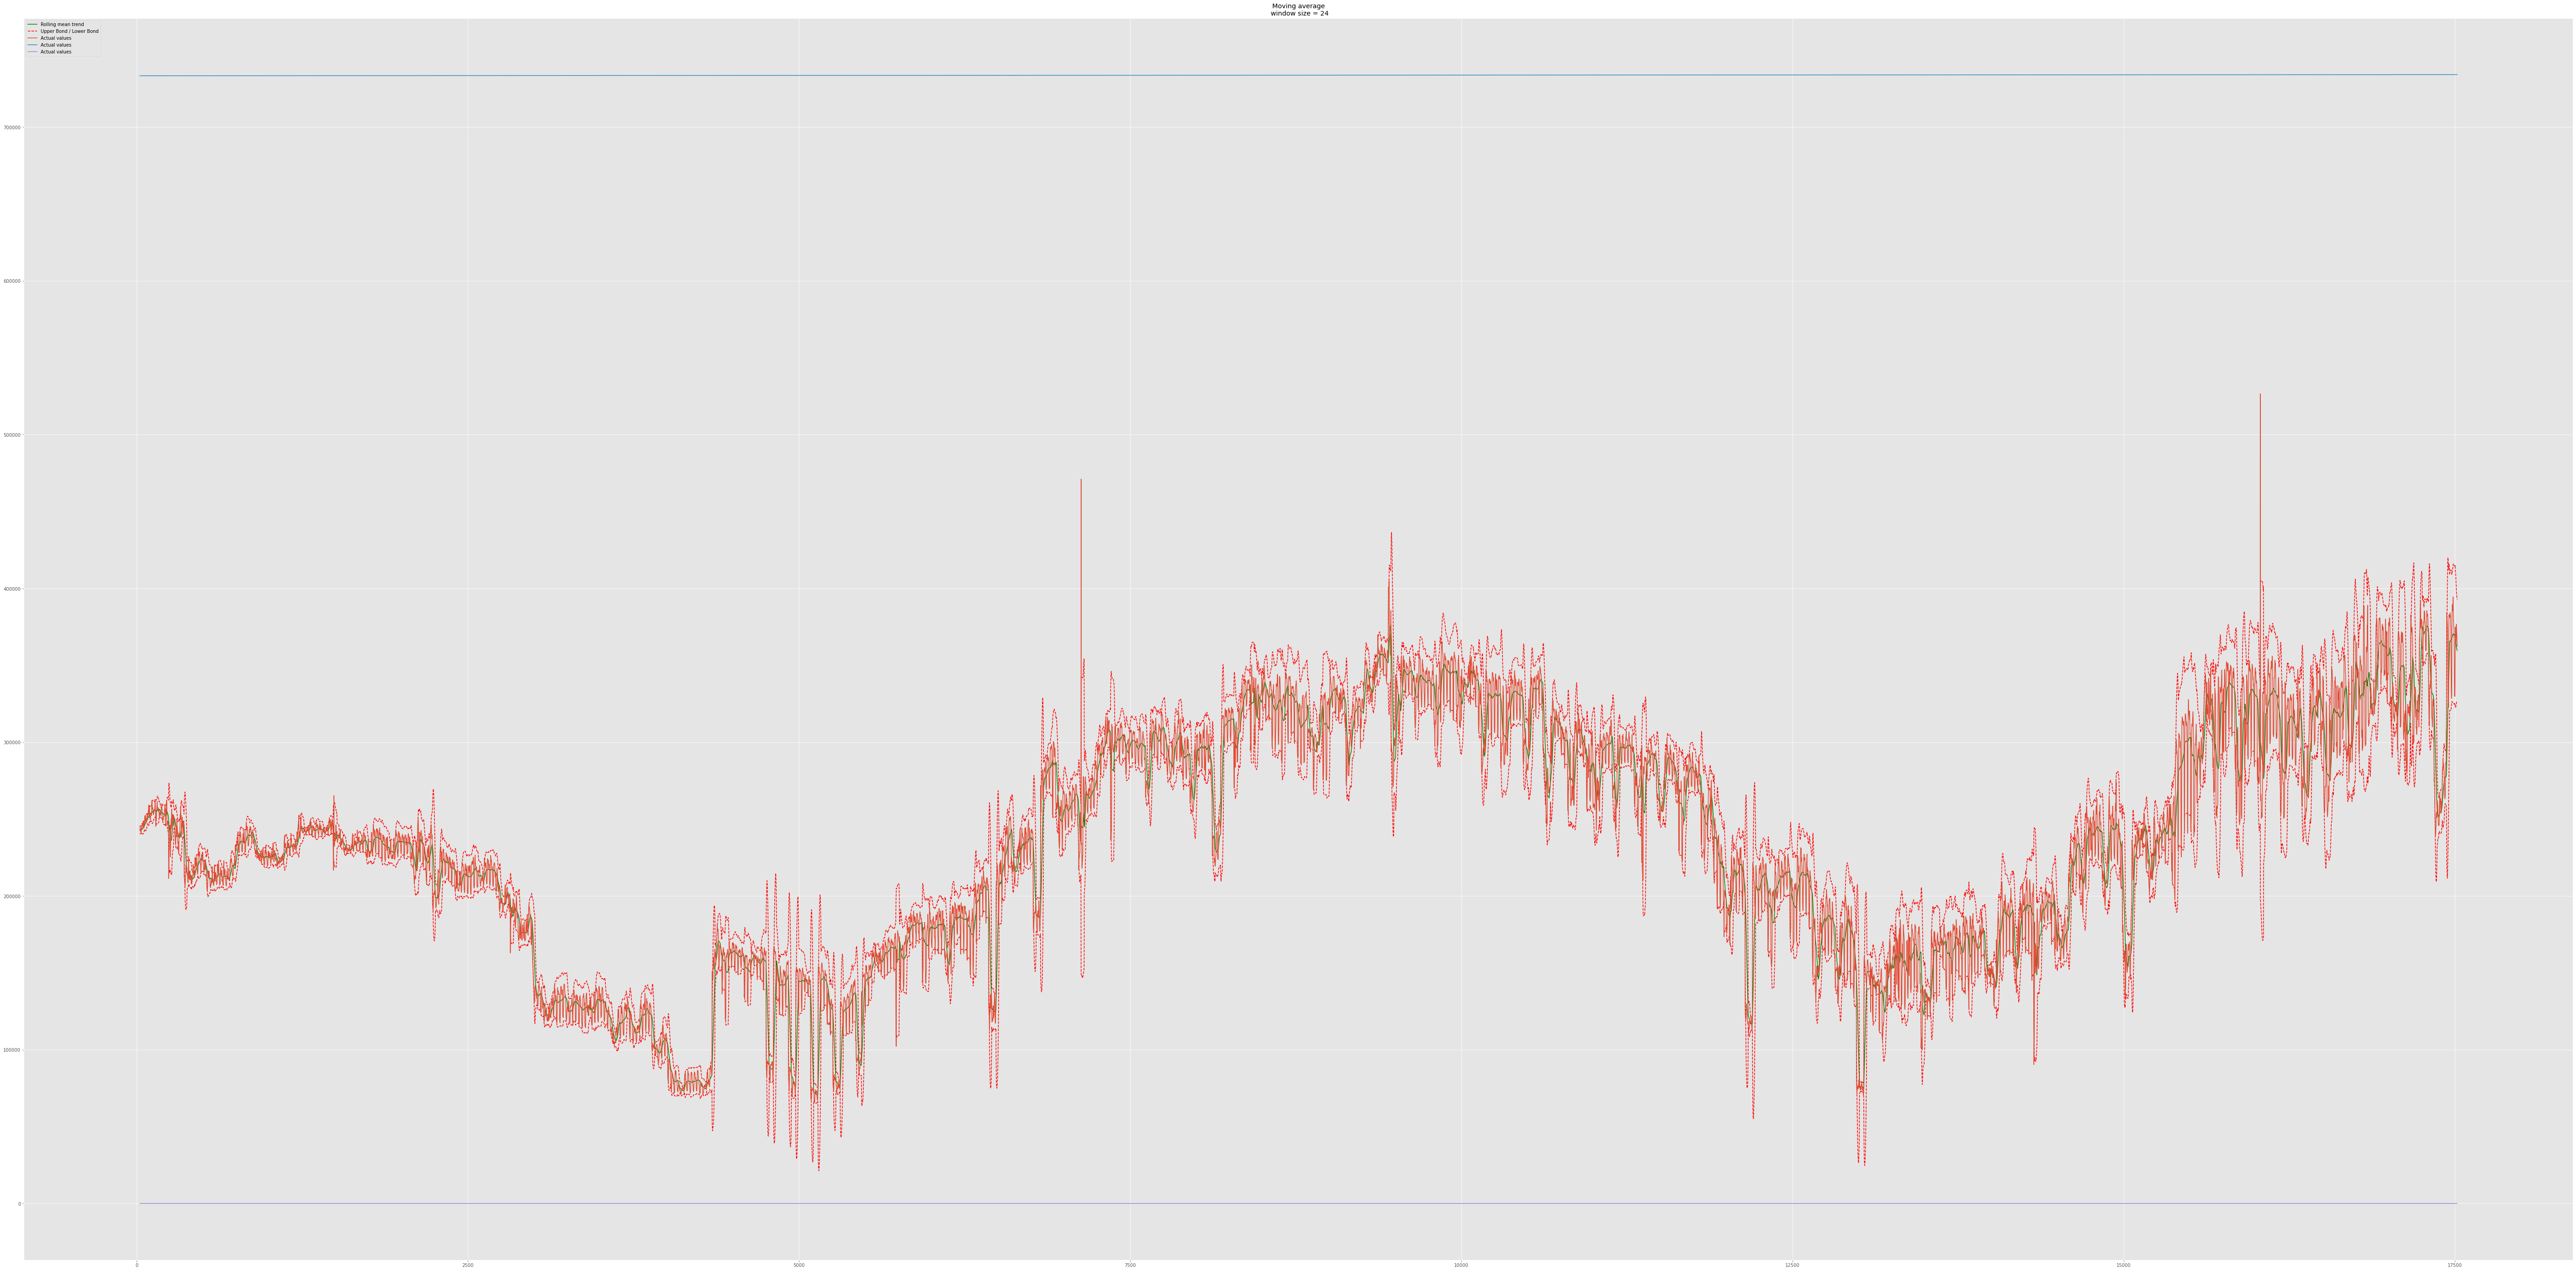

In [11]:
plotMovingAverage(df[['VALUE', 'DATE']], 24)

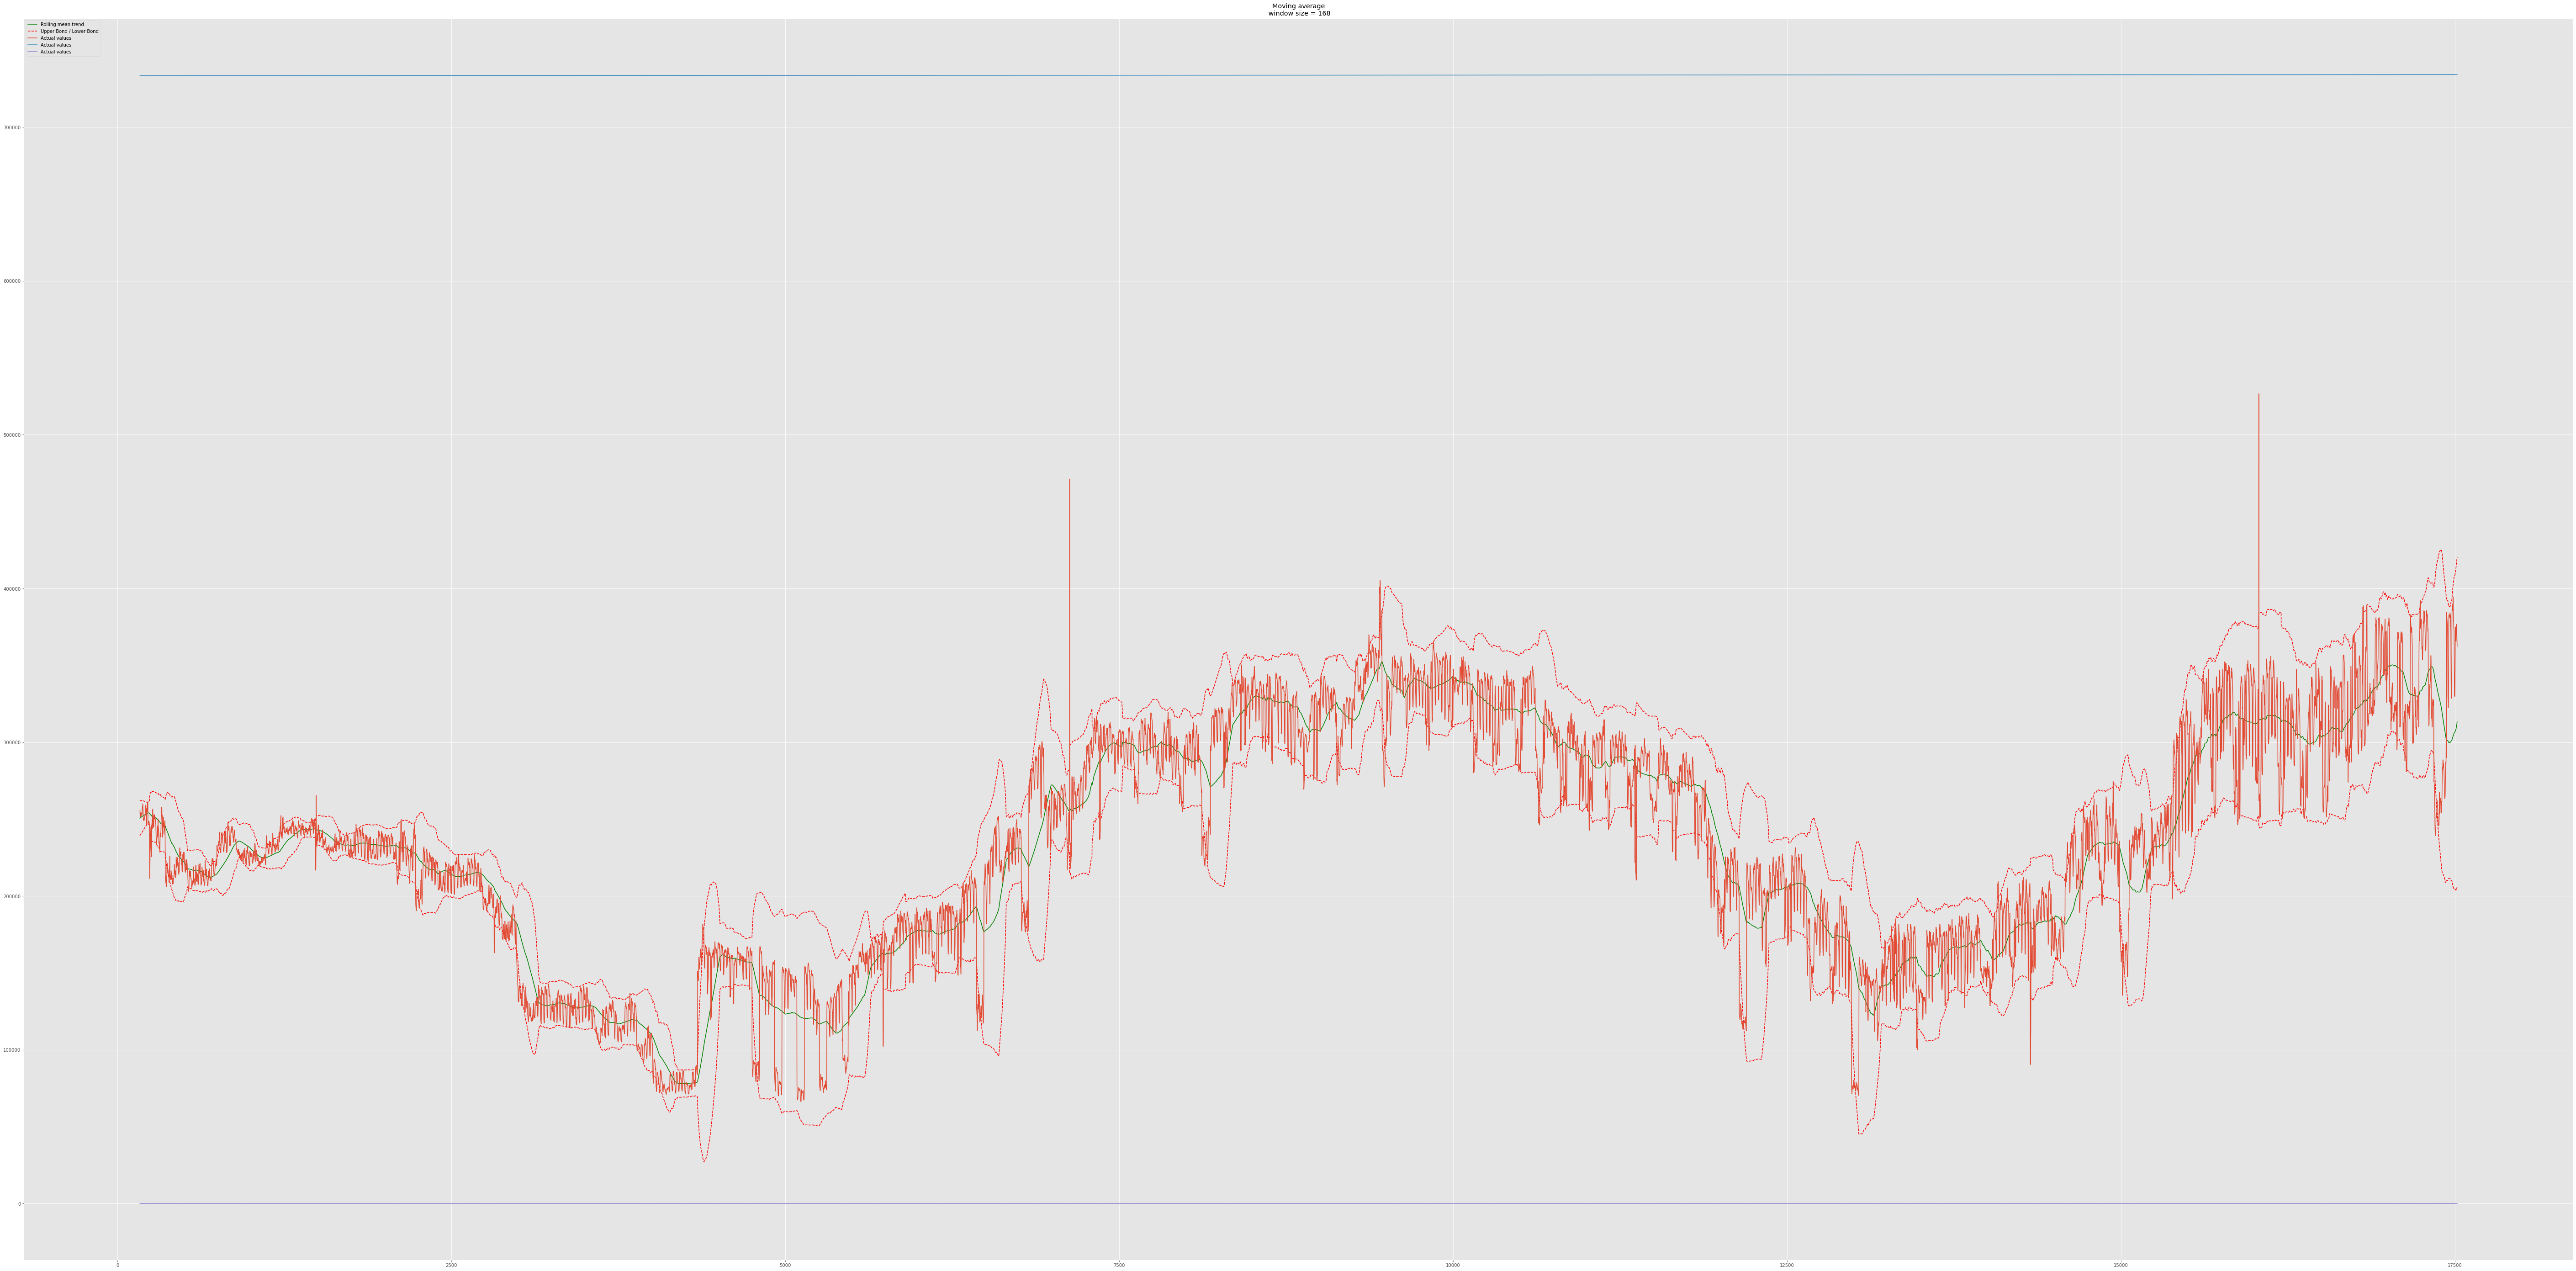

In [12]:
plotMovingAverage(df[['VALUE', 'DATE']], 24*7)

Text(0.5, 1.0, 'Поcуточное потребление электроэнергии')

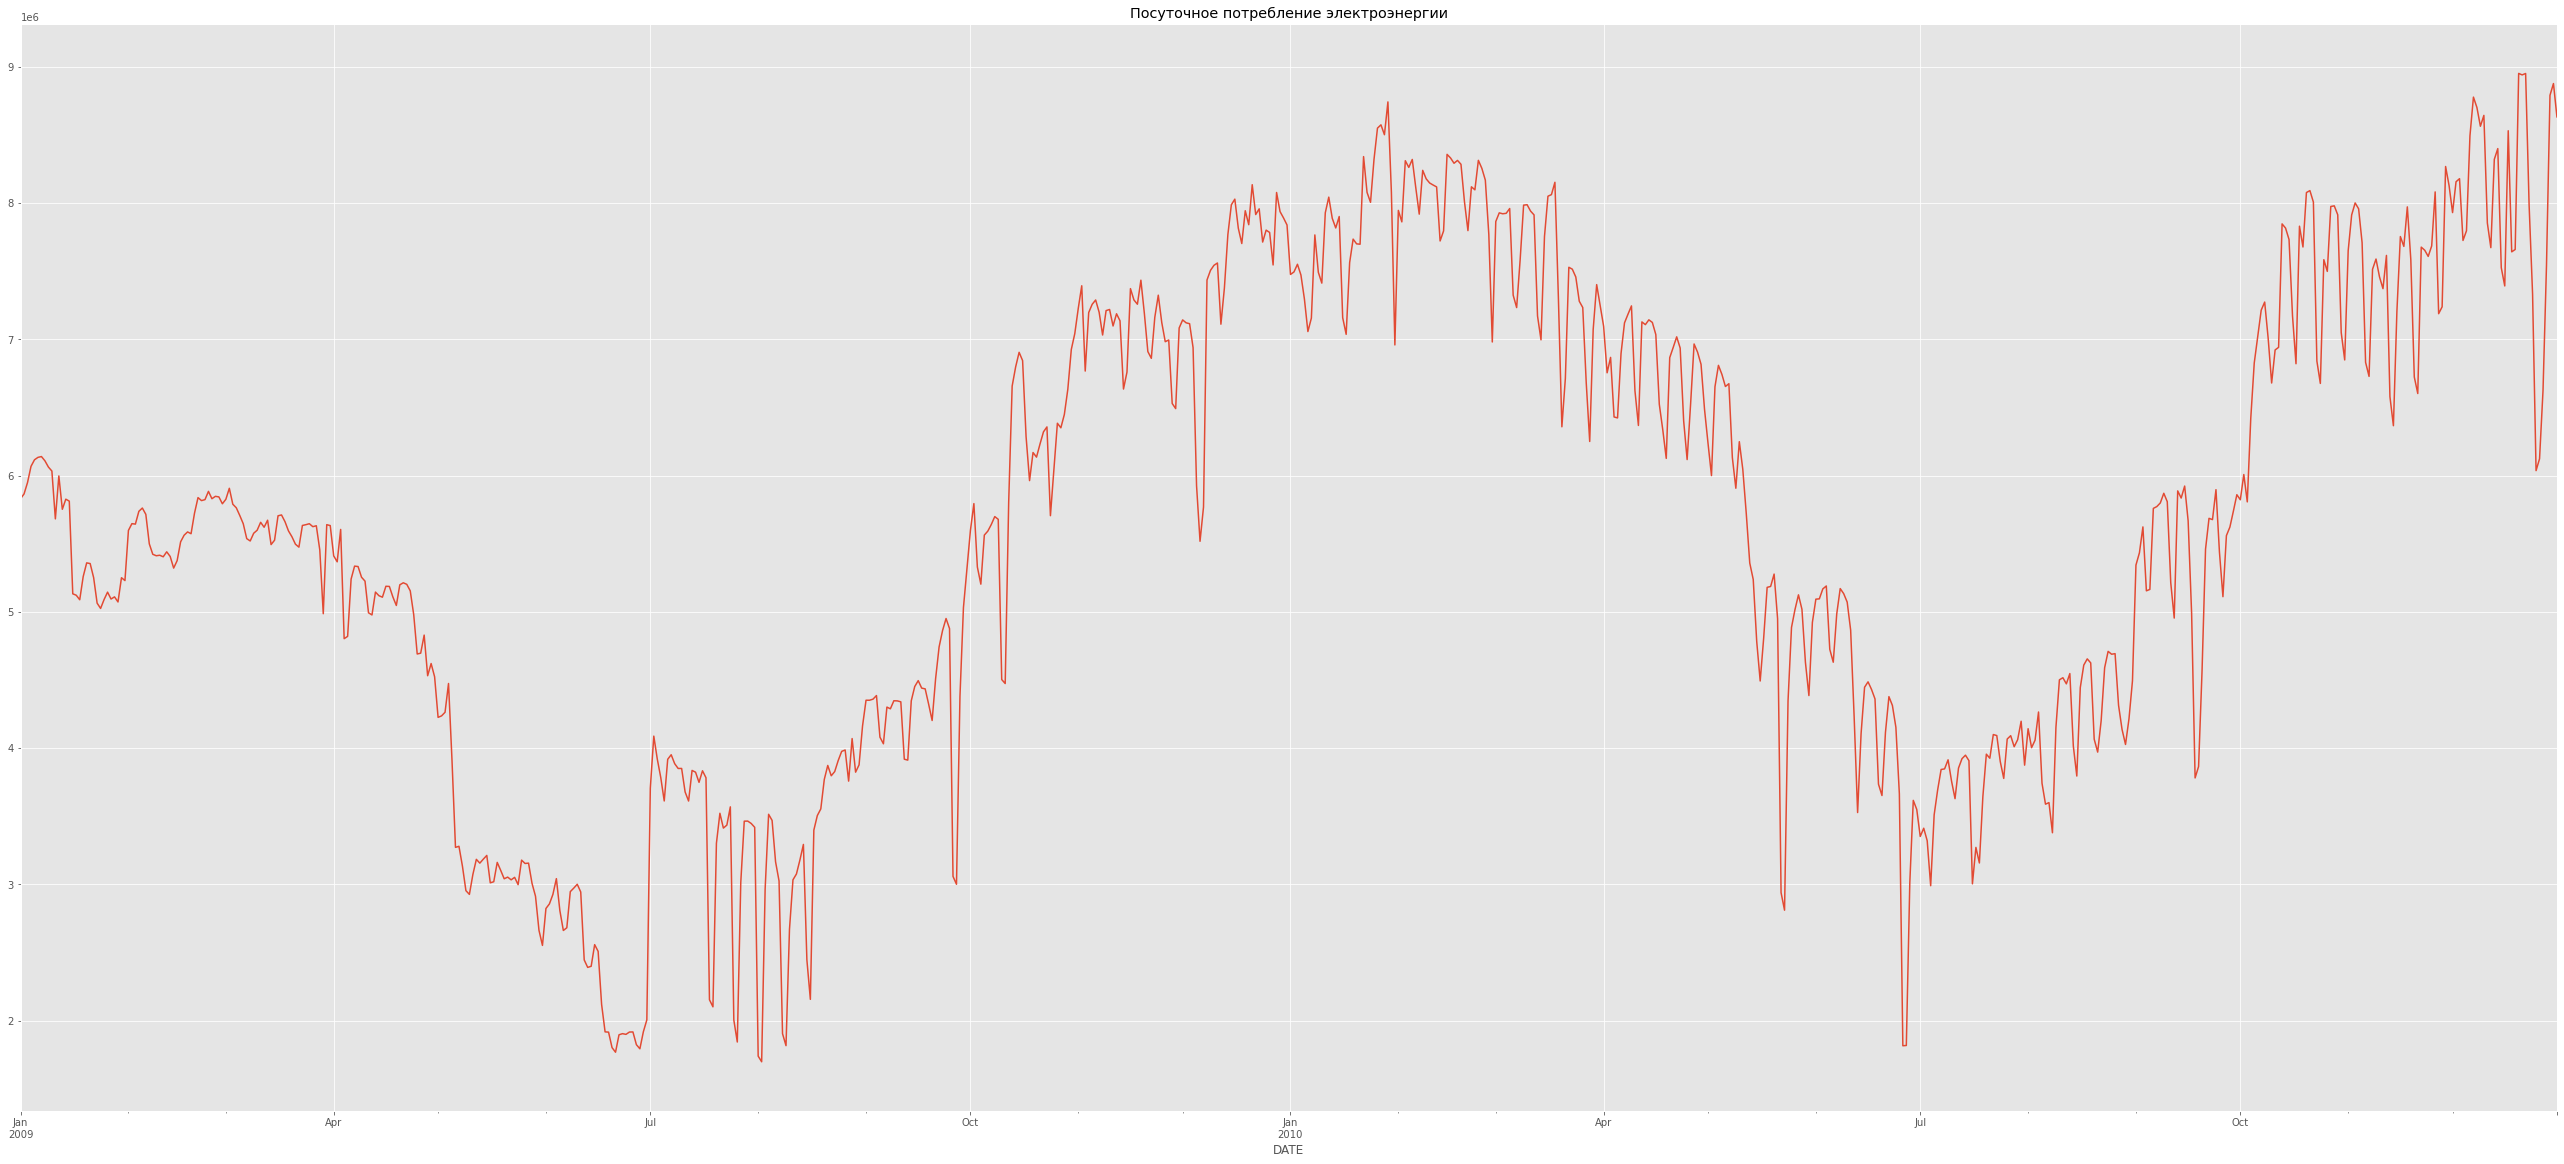

In [13]:
fig = plt.figure(figsize=(100, 20))
ax1 = fig.add_subplot(121)
new_df['VALUE'].plot(ax=ax1)
ax1.set_title(u'Поcуточное потребление электроэнергии')

In [315]:
df_day = new_df.copy()
df_day.head()

,VALUE
DATE,
2009-01-01,5830312.0
2009-01-02,5865441.0
2009-01-03,5949114.0
2009-01-04,6067779.0
2009-01-05,6115772.0


In [316]:
df_day['a'] = 1
df_day['day_num'] = range(1, len(new_df) + 1)
df_day['day_num2'] = df_day['day_num']**2
#df_day['day_num3'] = df_day['day_num']**3
#df_day['day_num4'] = df_day['day_num']**4
#df_day['day_num5'] = df_day['day_num']**5
#df_day['day_num6'] = df_day['day_num']**6
#df_day['day_num7'] = df_day['day_num']**7
#df_day["Month"] = df_day.index.month
#df_day["Weekday"] = df_day.index.weekday
#df_day['is_weekend'] = df_day.index.weekday.isin([5,6])*1
df_day.head()

,VALUE,a,day_num,day_num2
DATE,,,,
2009-01-01,5830312.0,1,1,1
2009-01-02,5865441.0,1,2,4
2009-01-03,5949114.0,1,3,9
2009-01-04,6067779.0,1,4,16
2009-01-05,6115772.0,1,5,25


In [317]:
#добавляем столбцы с днями
for x in range(1, 31):
    df_day['day_' + str(x)] = df_day.index.day == x

In [318]:
#добавляем столбцы с месяцами 
#for x in range(1, 12):
    #df_day['season_' + str(x)] = df_day.index.month == x

In [319]:
#df_day.head()

In [320]:
#добавляем столбцы с днями недели
for x in range(0, 6):
    df_day['weekday_' + str(x)] = df_day.index.weekday == x

In [321]:
#добавляем столбцы с неделями
#for x in range(1, 52):
    #df_day['week_' + str(x)] = df_day.index.week == x

In [322]:
#добавляем дни года
#for x in range(1, 365):
        #df_day['Yday_' + str(x)] = df_day.index.dayofyear == x

In [323]:
df_day.head()

,VALUE,a,day_num,day_num2,day_1,day_2,day_3,day_4,day_5,day_6,...,day_27,day_28,day_29,day_30,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5
DATE,,,,,,,,,,,,,,,,,,,,,
2009-01-01,5830312.0,1,1,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2009-01-02,5865441.0,1,2,4,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2009-01-03,5949114.0,1,3,9,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2009-01-04,6067779.0,1,4,16,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2009-01-05,6115772.0,1,5,25,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [324]:
# считаем индекс в датафрейме, после которого начинается тестовыый отрезок
test_index = int(len(df_day)*(1-0.01))
start_index = 620;
test_index

722

In [325]:
df_day = df_day.dropna()
df_day = df_day.reset_index(drop=True)

In [326]:
# разбиваем весь датасет на тренировочную и тестовую выборку
X_train = df_day.loc[start_index:test_index].drop(["VALUE"], axis=1)
y_train = df_day.loc[start_index:test_index]["VALUE"]
X_test = df_day.loc[test_index:].drop(["VALUE"], axis=1)
y_test = df_day.loc[test_index:]["VALUE"]
X = df_day.drop(["VALUE"], axis=1)
y = df_day.loc[:test_index]["VALUE"]

In [335]:
X_train.to_csv('x_train.csv')

In [328]:
prediction

array([7993330.3604683 , 7601725.50659519, 7434020.14191821,
       8199668.89804211, 8324036.01934126, 8419205.69651303,
       8238069.51857939, 8012986.61490518])

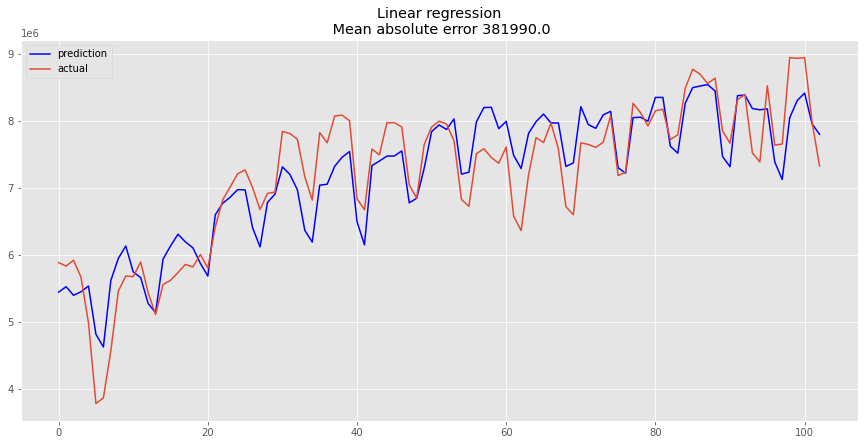

In [329]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(lr.predict(X_train), "b", label="prediction")
plt.plot(y_train.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error {}".format(round(mean_absolute_error(lr.predict(X_train), y_train))))
plt.grid(True);

In [330]:
print ('R^2: {0}'.format(lr.score(X_train, y_train)))

R^2: 0.8173925346310957


In [331]:
coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [lr.intercept_] +  lr.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef.head()

,predictor,coef
0,intercept,-1.912191e+08
1,a,4.832695e-06
2,day_num,5.618514e+05
3,day_num2,-3.972891e+02
4,day_1,-4.178924e+05


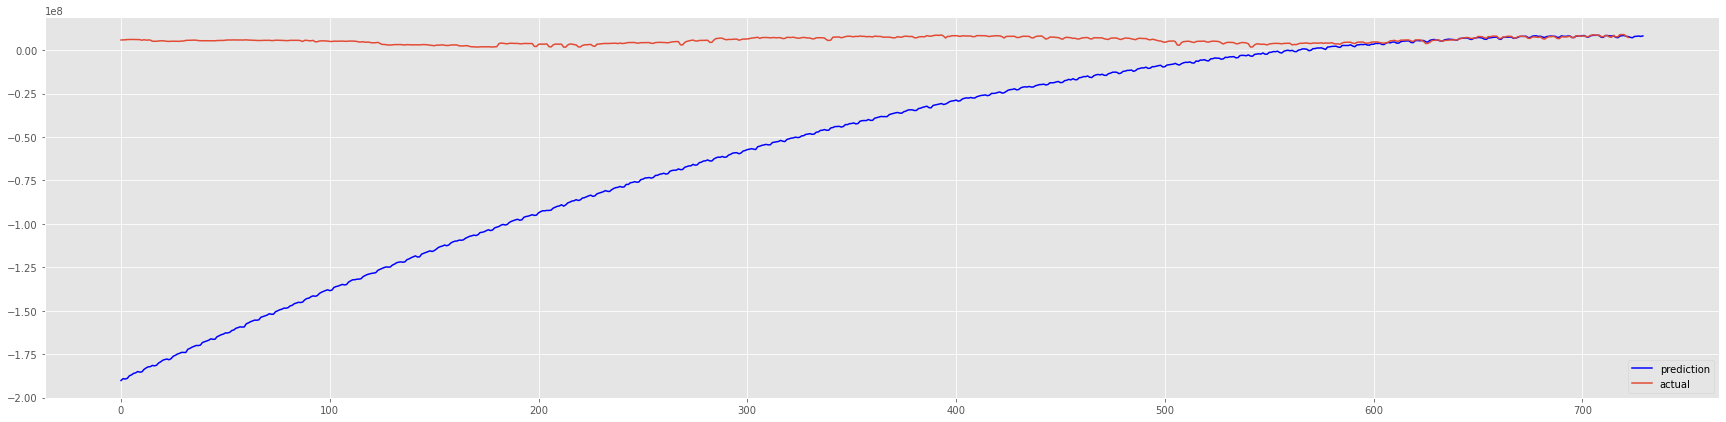

In [332]:
#lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
plt.figure(figsize=(30, 7))
plt.plot(lr.predict(X), "b", label="prediction")
plt.plot(y.values, label="actual")
plt.legend(loc="best")
plt.grid(True);

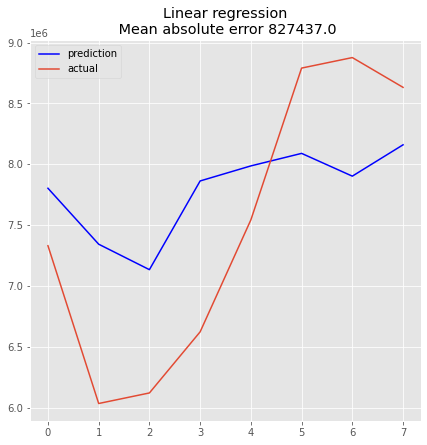

In [333]:
prediction = lr.predict(X_test)
plt.figure(figsize=(7, 7))
plt.plot(prediction, "b", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error {}".format(round(mean_absolute_error(prediction, y_test))))
plt.grid(True);

In [334]:
print ('R^2: {0}'.format(lr.score(X_test, y_test)))

R^2: 0.34370591837007725
